In [48]:
%autosave 90

# Basic libraries: numpy and pandas for data handling, pyplot 
# and seaborn for visualization, math for mathematical operations
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import classification_report
import os
from PIL import Image
import requests
from sklearn.metrics import log_loss

# Data split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

# Scaling methods and categorical variable encoder
from sklearn.preprocessing import LabelEncoder

# Model selection 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score ,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Data Normalization
from sklearn.neural_network import MLPClassifier, MLPRegressor
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Addicional 
from datetime import datetime
from datetime import date


Autosaving every 90 seconds


In [49]:
# Training data

train_demo = pd.read_excel('train_demo.xlsx')
train_habits = pd.read_excel('train_habits.xlsx')
train_health = pd.read_excel('train_health.xlsx')

# Testing data

test_demo = pd.read_excel('test_demo.xlsx')
test_habits = pd.read_excel('test_habits.xlsx')
test_health = pd.read_excel('test_health.xlsx')


In [50]:
# Join all the trainning data in 1 dataframe 

#train_demo.set_index('PatientID')
#train_habits.set_index('PatientID')
#train_health.set_index('PatientID')

train_full = pd.merge(pd.merge(train_demo, train_habits, on = 'PatientID'), train_health, on='PatientID')
#train_full.set_index('PatientID', inplace=True)
train_df = train_full.copy()

In [51]:
# Join all the testing data in 1 dataframe

#test_demo.set_index('PatientID')
#test_habits.set_index('PatientID')
#test_health.set_index('PatientID')

test_full = pd.merge(pd.merge(test_demo, test_habits, on='PatientID'), test_health, on='PatientID')
#test_full.set_index('PatientID', inplace=True)
test_df = test_full.copy()

In [52]:
# Fill Nan for Mode of Education, once columns Education is the only one with Nans 
train_df = train_df.fillna(train_df['Education'].mode()[0])
train_df.set_index('PatientID',inplace=True)
test_df.set_index('PatientID',inplace=True)
train_df

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...
1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,Mr. Philip Klink,1972,East Midlands,High School Incomplete (10th to 11th grade),0,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,178,61,204,144,12,4,Not sure,Neither I nor my immediate family have diabetes.
1386,Mrs. Jackie Valencia,1980,North West,Elementary School (1st to 9th grade),1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,157,61,213,120,23,0,More than 3 years,I have/had pregnancy diabetes or borderline di...
1088,Mrs. Cheryl Harris,1860,East Midlands,Elementary School (1st to 9th grade),0,No,I consider myself a social drinker,No,3 to 4 pieces of fruit in average,More than half a liter but less than one liter,167,48,272,140,20,17,More than 3 years,Neither I nor my immediate family have diabetes.


In [53]:
# Change the LONDON to London in Training df

train_df['Region'] = train_df['Region'].replace(['LONDON'], 'London')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         800 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

In [54]:
# Droping elements that have been born after 1900 once we can check that are outliers

train_df = train_df[train_df['Birth_Year'] > 1900]

In [55]:
# Drop 500+ cholesterol patients
train_df = train_df[train_df['High_Cholesterol'] < 500]

In [56]:
# Change Yes and No to 1 and 0s

train_df['Exercise'] = train_df['Exercise'].map({'Yes': 1, 'No': 0})
train_df['Smoking_Habit'] = train_df['Smoking_Habit'].map({'Yes': 1, 'No': 0})
train_df

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,0,I usually consume alcohol every day,1,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,0,I consider myself a social drinker,1,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,0,I consider myself a social drinker,0,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,0,I usually consume alcohol every day,1,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...
1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,0,I consider myself a social drinker,0,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,Mr. Mike Jefferson,1987,Yorkshire and the Humber,High School Graduate,0,0,I usually consume alcohol every day,1,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,74,202,120,13,7,Not sure,Neither I nor my immediate family have diabetes.
1909,Mr. Philip Klink,1972,East Midlands,High School Incomplete (10th to 11th grade),0,0,I consider myself a social drinker,1,Less than 1. I do not consume fruits every day.,Between one liter and two liters,178,61,204,144,12,4,Not sure,Neither I nor my immediate family have diabetes.
1386,Mrs. Jackie Valencia,1980,North West,Elementary School (1st to 9th grade),1,0,I usually consume alcohol every day,0,Less than 1. I do not consume fruits every day.,Between one liter and two liters,157,61,213,120,23,0,More than 3 years,I have/had pregnancy diabetes or borderline di...


In [57]:
# Change categorical variables into numeric representation

categorical_features = ['Region','Education','Drinking_Habit','Fruit_Habit','Water_Habit','Checkup','Diabetes']
train_df = pd.get_dummies(train_df, columns = categorical_features)
train_df

,Name,Birth_Year,Disease,Smoking_Habit,Exercise,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,...,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter,Checkup_Less than 3 years but more than 1 year,Checkup_Less than three months,Checkup_More than 3 years,Checkup_Not sure,Diabetes_I do have diabetes,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.
PatientID,,,,,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,1,0,1,155,67,358,120,21,...,0,0,0,0,1,0,0,0,0,1
1805,Mr. Sherman Nero,1969,1,0,1,173,88,230,142,9,...,0,0,0,0,0,1,0,0,0,1
1557,Mr. Mark Boller,1974,1,0,0,162,68,226,122,26,...,0,1,0,0,1,0,0,0,0,1
1658,Mr. David Caffee,1958,0,0,1,180,66,313,125,13,...,0,1,0,0,0,1,0,0,1,0
1544,Mr. Gerald Emery,1968,1,0,0,180,58,277,125,18,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,Mr. Mike Jefferson,1987,0,0,1,173,74,202,120,13,...,0,0,0,0,0,1,0,0,0,1
1909,Mr. Philip Klink,1972,0,0,1,178,61,204,144,12,...,0,0,0,0,0,1,0,0,0,1
1386,Mrs. Jackie Valencia,1980,1,0,0,157,61,213,120,23,...,0,0,0,0,1,0,0,0,1,0


In [58]:
# Change Yes and No to 1 and 0s

test_df['Exercise'] = test_df['Exercise'].map({'Yes': 1, 'No': 0})
test_df['Smoking_Habit'] = test_df['Smoking_Habit'].map({'Yes': 1, 'No': 0})
test_df

,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,
1343,Mr. Ricardo Sherman,1970,East Midlands,Elementary School (1st to 9th grade),1,I usually consume alcohol every day,0,Less than 1. I do not consume fruits every day.,Between one liter and two liters,172,80,203,172,20,2,Not sure,I have/had pregnancy diabetes or borderline di...
1727,Mr. Jessie Strickland,1966,Yorkshire and the Humber,University Complete (3 or more years),0,I consider myself a social drinker,0,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,171,80,225,130,21,0,Not sure,I do have diabetes
1828,Mr. Robert Foreman,1978,West Midlands,High School Incomplete (10th to 11th grade),0,I usually consume alcohol every day,1,Less than 1. I do not consume fruits every day.,Between one liter and two liters,171,78,237,130,24,1,More than 3 years,I have/had pregnancy diabetes or borderline di...
1155,Mr. Edwin Ferguson,1968,Yorkshire and the Humber,High School Incomplete (10th to 11th grade),0,I usually consume alcohol every day,0,Less than 1. I do not consume fruits every day.,Less than half a liter,174,87,313,108,19,0,Not sure,I do have diabetes
1020,Mr. Eliseo Krefft,1962,East Midlands,High School Incomplete (10th to 11th grade),0,I consider myself a social drinker,0,Less than 1. I do not consume fruits every day.,Less than half a liter,172,56,189,140,19,14,More than 3 years,I have/had pregnancy diabetes or borderline di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Mr. John Eichhorn,1970,East Midlands,University Incomplete (1 to 2 years),0,I usually consume alcohol every day,0,3 to 4 pieces of fruit in average,More than half a liter but less than one liter,178,89,216,125,22,4,Not sure,Neither I nor my immediate family have diabetes.
1256,Mrs. Tiffany Medley,1987,West Midlands,University Complete (3 or more years),0,I usually consume alcohol every day,0,Less than 1. I do not consume fruits every day.,Less than half a liter,154,63,187,138,25,6,More than 3 years,Neither I nor my immediate family have diabetes.
1318,Mr. Kenneth Crase,1963,East Midlands,High School Graduate,0,I usually consume alcohol every day,1,1 to 2 pieces of fruit in average,Between one liter and two liters,173,90,181,140,20,0,Not sure,Neither I nor my immediate family have diabetes.


In [59]:
# Separate names with Patient ID for a separated DataFrame 

#PatientNameID = train_df[['PatientID','Name']]
#PatientNameID

# Drop Name, once those are already saved in other df, in order to have only numerica features 
train_df.drop('Name', axis= 1, inplace = True)


In [60]:
# Separate names with Patient ID for a separated DataFrame 

#PatientNameID_test = test_df[['PatientID','Name']]
#PatientNameID_test

# Drop Name, once those are already saved in other df, in order to have only numerica features 
test_df.drop('Name', axis= 1, inplace = True)


In [61]:
# Change categorical variables into numeric representation

categorical_features_test = ['Region','Education','Drinking_Habit','Fruit_Habit','Water_Habit','Checkup','Diabetes']
test_df = pd.get_dummies(test_df, columns = categorical_features_test)
test_df

,Birth_Year,Smoking_Habit,Exercise,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Region_East Midlands,...,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter,Checkup_Less than 3 years but more than 1 year,Checkup_Less than three months,Checkup_More than 3 years,Checkup_Not sure,Diabetes_I do have diabetes,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.
PatientID,,,,,,,,,,,,,,,,,,,,,
1343,1970,1,0,172,80,203,172,20,2,1,...,0,0,0,0,0,1,0,0,1,0
1727,1966,0,0,171,80,225,130,21,0,0,...,0,1,0,0,0,1,1,0,0,0
1828,1978,0,1,171,78,237,130,24,1,0,...,0,0,0,0,1,0,0,0,1,0
1155,1968,0,0,174,87,313,108,19,0,0,...,1,0,0,0,0,1,1,0,0,0
1020,1962,0,0,172,56,189,140,19,14,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,1970,0,0,178,89,216,125,22,4,1,...,0,1,0,0,0,1,0,0,0,1
1256,1987,0,0,154,63,187,138,25,6,0,...,1,0,0,0,1,0,0,0,0,1
1318,1963,0,1,173,90,181,140,20,0,1,...,0,0,0,0,0,1,0,0,0,1


In [62]:
# Split the data into x and y

X = train_df.drop(['Disease'], axis = 1) 
y = train_df['Disease']

In [63]:
DecisionTree = DecisionTreeClassifier(random_state=0,
                                      criterion= 'entropy',
                                      max_depth=10)
DecisionTree.fit(X,y)

# Feature Importance

fi_col = []
fi = []

for i,column in enumerate(train_df.drop(['Disease'], axis = 1)):
    fi_col.append(column)
    fi.append(DecisionTree.feature_importances_[i])

fi_DecisionTree = pd.DataFrame(zip(fi_col, fi), columns = ['Feature','Feature Importance'])
fi_DecisionTree = fi_DecisionTree.sort_values('Feature Importance', ascending = False).reset_index().drop('index',axis=1)
fi_DecisionTree

# Creating list of columns to keep, only include feactures that contribute to model prediction
# Only regarding Importance above 0.02

DecisionTree_columns_to_keep = fi_DecisionTree.loc[(fi_DecisionTree['Feature Importance'] > 0.02)]

DT_columns_to_keep = DecisionTree_columns_to_keep['Feature'].values

X = X[DT_columns_to_keep]

X

,Checkup_More than 3 years,Birth_Year,Physical_Health,Diabetes_Neither I nor my immediate family have diabetes.,Fruit_Habit_Less than 1. I do not consume fruits every day.,High_Cholesterol,Mental_Health,Blood_Pressure,Fruit_Habit_1 to 2 pieces of fruit in average,Weight,Drinking_Habit_I usually consume alcohol every day
PatientID,,,,,,,,,,,
1167,1,1965,2,1,1,358,21,120,0,67,1
1805,0,1969,0,1,1,230,9,142,0,88,0
1557,1,1974,0,1,1,226,26,122,0,68,0
1658,0,1958,8,0,1,313,13,125,0,66,1
1544,1,1968,2,0,0,277,18,125,1,58,0
...,...,...,...,...,...,...,...,...,...,...,...
1912,0,1987,7,1,1,202,13,120,0,74,1
1909,0,1972,4,1,1,204,12,144,0,61,0
1386,1,1980,0,0,1,213,23,120,0,61,1


In [64]:
# First split
X_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    test_size = 0.2,
                                                    random_state = 2
                                                   )

print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# IMPORTANTE : the larger the 'test_size' the highest the accurancy  

(158, 11)
(628,)
(158,)


In [65]:
# Trainning our model

random_forest_model = RandomForestClassifier(criterion = 'entropy',
                                 max_depth = 10,
                                 min_samples_split = 2,
                                 max_features = 'auto',
                                 bootstrap = False,
                                 oob_score = False,
                                 warm_start = False,
                                 class_weight = 'balanced',
                                 min_samples_leaf = 1,
                                 random_state = 0,
                                 )

random_forest_model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_depth=10, random_state=0)

In [66]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_random_forest = random_forest_model.predict(x_test)
y_pred_random_forest

# predict_proba - Probability estimates 

y_pred_proba_random_forest = random_forest_model.predict_proba(x_test)


The Training Accuracy is:  1.0
The Testing Accuracy is:  1.0

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        78

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



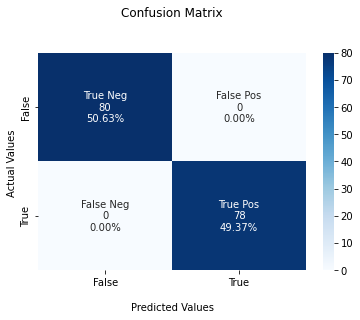

The True Positive Rate is:  [1. 1.]
The Average True Positive Rate is:  1.0

The Positive Precision Value is:  1.0


In [67]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', random_forest_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', random_forest_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_random_forest))

# Confusion Matrix function

cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_random_forest.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_random_forest.flatten()/np.sum(cm_random_forest)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_random_forest, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_random_forest = cm_random_forest.sum(axis=0) - np.diag(cm_random_forest)

FN_random_forest = cm_random_forest.sum(axis=1) - np.diag(cm_random_forest)

TP_random_forest = np.diag(cm_random_forest)

TN_random_forest = cm_random_forest.sum() - (FP_random_forest - FN_random_forest - TP_random_forest)

# Sensitivity, hit rate, recall, or positive rate

TPR_random_forest = TP_random_forest / (TP_random_forest + FN_random_forest)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_random_forest)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_random_forest.sum()/2)

# Precision or positive predictive value

PPV_random_forest = TP_random_forest / (TP_random_forest + FP_random_forest)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_random_forest.sum()/2)




In [68]:
y_pred_random_forest

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1], dtype=int64)

In [69]:
df = pd.DataFrame()
test_df = test_df[DT_columns_to_keep]
test_df

,Checkup_More than 3 years,Birth_Year,Physical_Health,Diabetes_Neither I nor my immediate family have diabetes.,Fruit_Habit_Less than 1. I do not consume fruits every day.,High_Cholesterol,Mental_Health,Blood_Pressure,Fruit_Habit_1 to 2 pieces of fruit in average,Weight,Drinking_Habit_I usually consume alcohol every day
PatientID,,,,,,,,,,,
1343,0,1970,2,0,1,203,20,172,0,80,1
1727,0,1966,0,0,1,225,21,130,0,80,0
1828,1,1978,1,0,1,237,24,130,0,78,1
1155,0,1968,0,0,1,313,19,108,0,87,1
1020,1,1962,14,0,1,189,19,140,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...
1000,0,1970,4,1,0,216,22,125,0,89,1
1256,1,1987,6,1,1,187,25,138,0,63,1
1318,0,1963,0,1,0,181,20,140,1,90,1


In [70]:
 test_df.reset_index()

,PatientID,Checkup_More than 3 years,Birth_Year,Physical_Health,Diabetes_Neither I nor my immediate family have diabetes.,Fruit_Habit_Less than 1. I do not consume fruits every day.,High_Cholesterol,Mental_Health,Blood_Pressure,Fruit_Habit_1 to 2 pieces of fruit in average,Weight,Drinking_Habit_I usually consume alcohol every day
0,1343,0,1970,2,0,1,203,20,172,0,80,1
1,1727,0,1966,0,0,1,225,21,130,0,80,0
2,1828,1,1978,1,0,1,237,24,130,0,78,1
3,1155,0,1968,0,0,1,313,19,108,0,87,1
4,1020,1,1962,14,0,1,189,19,140,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...
220,1000,0,1970,4,1,0,216,22,125,0,89,1
221,1256,1,1987,6,1,1,187,25,138,0,63,1
222,1318,0,1963,0,1,0,181,20,140,1,90,1
223,1953,1,1977,0,1,1,240,18,138,0,45,0


In [74]:
df['PatientID'] = test_df.reset_index()['PatientID']
df['Disease'] = random_forest_model.predict(test_df)
df 



,PatientID,Disease
0,1343,1
1,1727,1
2,1828,1
3,1155,1
4,1020,0
...,...,...
220,1000,0
221,1256,1
222,1318,0
223,1953,1


In [75]:
df.to_csv('Group60_Version01.csv', index = False)